# Relocalization using ResNet50

In [2]:
import numpy as np
from matplotlib import pyplot as plt
import cv2 as cv
from sklearn.cluster import DBSCAN
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input
from tensorflow.keras.preprocessing import image as kimage
from scipy.spatial.transform import Rotation as R
import os
import time

resnet = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3), pooling='avg')
dataset_processed_path = '/home/simone/tesi_ws/src/create_dataset/create_dataset/dataset_processed_v2/'
dataset_file = 'filtered_dataset_v2.npy'
dataset_array = np.load(dataset_processed_path + dataset_file)
dataset_array[:1]

/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
2023-12-19 00:47:19.501960: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-12-19 00:47:19.502404: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-12-19 00:47:19.539004: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-12-19 00:47:19.621008: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use 

array([[ 0.00000000e+00,  1.26900955e-06, -1.88639280e-07,
         1.00000000e-02,  0.00000000e+00,  0.00000000e+00,
        -7.23014980e-02,  9.97382822e-01]])

### Optimize centroid

1/1 [==============================] - 0s 29ms/step
Predict: 146.0 ms
1/1 [==============================] - 0s 20ms/step
Predict: 122.0 ms
1/1 [==============================] - 0s 19ms/step
Predict: 120.0 ms
1/1 [==============================] - 0s 23ms/step
Predict: 82.0 ms
1/1 [==============================] - 0s 25ms/step
Predict: 83.0 ms
1/1 [==============================] - 0s 21ms/step
Predict: 79.0 ms
1/1 [==============================] - 0s 20ms/step
Predict: 86.0 ms
1/1 [==============================] - 0s 20ms/step
Predict: 89.0 ms
1/1 [==============================] - 0s 21ms/step
Predict: 89.0 ms
1/1 [==============================] - 0s 20ms/step
Predict: 83.0 ms
1/1 [==============================] - 0s 28ms/step
Predict: 83.0 ms
1/1 [==============================] - 0s 21ms/step
Predict: 80.0 ms
1/1 [==============================] - 0s 19ms/step
Predict: 87.0 ms
1/1 [==============================] - 0s 19ms/step
Predict: 81.0 ms
1/1 [==========================

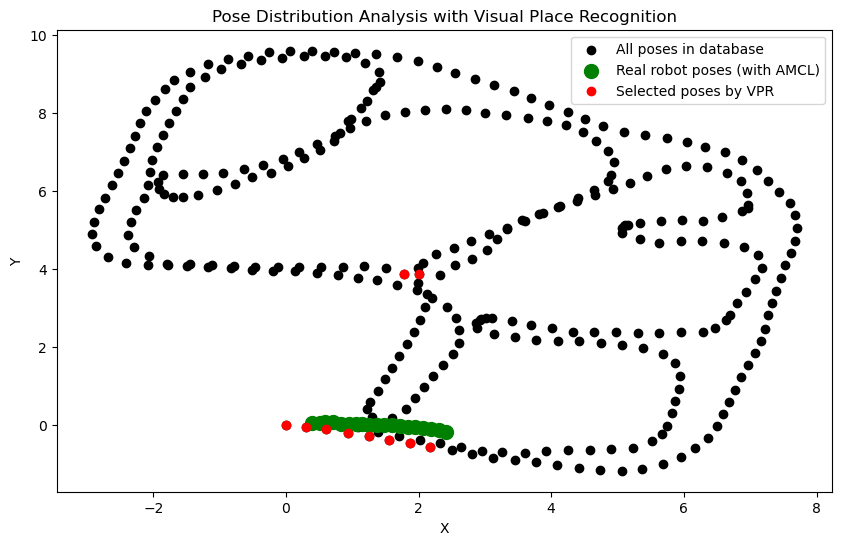

[ 1.24704458  0.56981501  0.01        0.          0.         -0.12172268
  0.99256415]
1/1 [==============================] - 0s 23ms/step
Predict: 81.0 ms
1/1 [==============================] - 0s 18ms/step
Predict: 75.0 ms
1/1 [==============================] - 0s 19ms/step
Predict: 78.0 ms
1/1 [==============================] - 0s 18ms/step
Predict: 80.0 ms
1/1 [==============================] - 0s 20ms/step
Predict: 79.0 ms
1/1 [==============================] - 0s 23ms/step
Predict: 85.0 ms
1/1 [==============================] - 0s 22ms/step
Predict: 83.0 ms
1/1 [==============================] - 0s 19ms/step
Predict: 80.0 ms
1/1 [==============================] - 0s 20ms/step
Predict: 84.0 ms
1/1 [==============================] - 0s 20ms/step
Predict: 79.0 ms
1/1 [==============================] - 0s 20ms/step
Predict: 81.0 ms
1/1 [==============================] - 0s 20ms/step
Predict: 82.0 ms
1/1 [==============================] - 0s 20ms/step
Predict: 80.0 ms
1/1 [===========

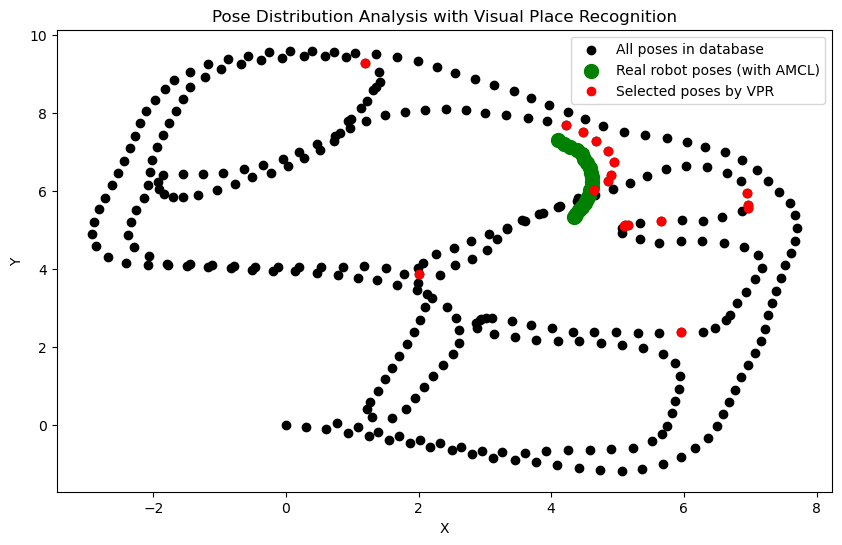

[ 4.92549302  6.01575849  0.01        0.          0.         -0.81510317
  0.57931583]
1/1 [==============================] - 0s 18ms/step
Predict: 65.0 ms
1/1 [==============================] - 0s 18ms/step
Predict: 54.0 ms
1/1 [==============================] - 0s 19ms/step
Predict: 54.0 ms
1/1 [==============================] - 0s 19ms/step
Predict: 54.0 ms
1/1 [==============================] - 0s 25ms/step
Predict: 61.0 ms
1/1 [==============================] - 0s 18ms/step
Predict: 56.0 ms
1/1 [==============================] - 0s 18ms/step
Predict: 57.0 ms
1/1 [==============================] - 0s 18ms/step
Predict: 55.0 ms
1/1 [==============================] - 0s 19ms/step
Predict: 56.0 ms
1/1 [==============================] - 0s 23ms/step
Predict: 65.0 ms
1/1 [==============================] - 0s 19ms/step
Predict: 56.0 ms
1/1 [==============================] - 0s 18ms/step
Predict: 55.0 ms
1/1 [==============================] - 0s 18ms/step
Predict: 56.0 ms
1/1 [===========

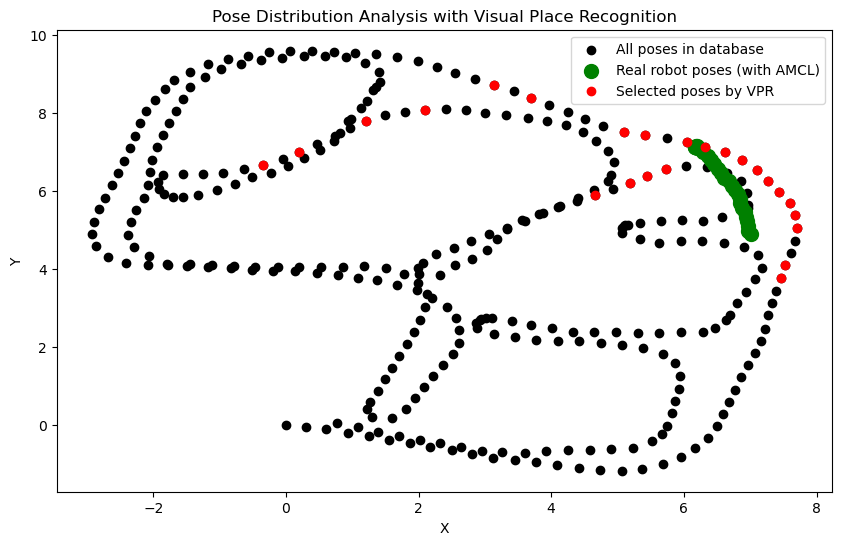

[5.29729234 6.57041613 0.01       0.         0.         0.85800621
 0.51363931]
1/1 [==============================] - 0s 20ms/step
Predict: 63.0 ms
1/1 [==============================] - 0s 17ms/step
Predict: 60.0 ms
1/1 [==============================] - 0s 20ms/step
Predict: 61.0 ms
1/1 [==============================] - 0s 19ms/step
Predict: 65.0 ms
1/1 [==============================] - 0s 19ms/step
Predict: 69.0 ms
1/1 [==============================] - 0s 27ms/step
Predict: 66.0 ms
1/1 [==============================] - 0s 20ms/step
Predict: 67.0 ms
1/1 [==============================] - 0s 17ms/step
Predict: 61.0 ms
1/1 [==============================] - 0s 20ms/step
Predict: 68.0 ms
1/1 [==============================] - 0s 21ms/step
Predict: 69.0 ms
1/1 [==============================] - 0s 21ms/step
Predict: 62.0 ms
1/1 [==============================] - 0s 19ms/step
Predict: 65.0 ms
1/1 [==============================] - 0s 21ms/step
Predict: 60.0 ms
1/1 [==================

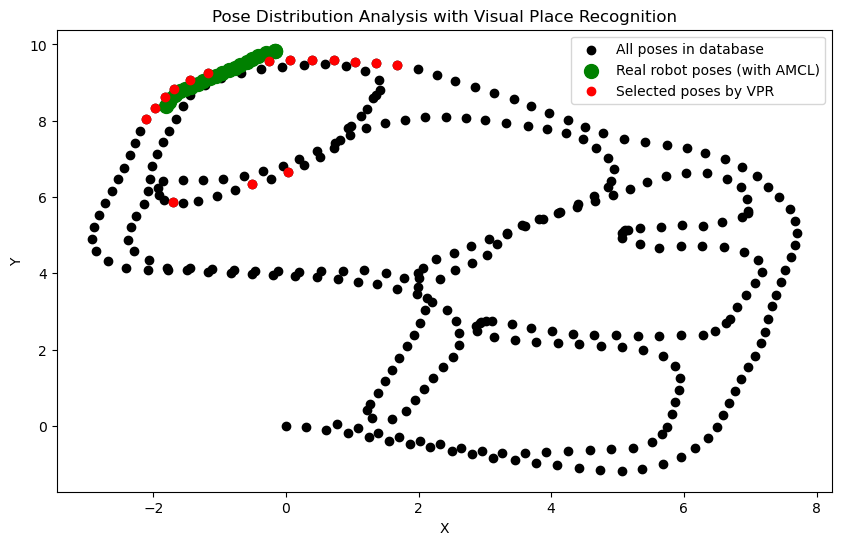

[-0.46206368  8.61901483  0.01        0.          0.         -0.90581266
  0.42367844]
1/1 [==============================] - 0s 19ms/step
Predict: 69.0 ms
1/1 [==============================] - 0s 25ms/step
Predict: 62.0 ms
1/1 [==============================] - 0s 19ms/step
Predict: 66.0 ms
1/1 [==============================] - 0s 17ms/step
Predict: 65.0 ms
1/1 [==============================] - 0s 25ms/step
Predict: 65.0 ms
1/1 [==============================] - 0s 17ms/step
Predict: 66.0 ms
1/1 [==============================] - 0s 25ms/step
Predict: 63.0 ms
1/1 [==============================] - 0s 18ms/step
Predict: 66.0 ms
1/1 [==============================] - 0s 21ms/step
Predict: 69.0 ms
1/1 [==============================] - 0s 18ms/step
Predict: 77.0 ms
1/1 [==============================] - 0s 21ms/step
Predict: 103.0 ms
1/1 [==============================] - 0s 18ms/step
Predict: 71.0 ms
1/1 [==============================] - 0s 19ms/step
Predict: 67.0 ms
1/1 [==========

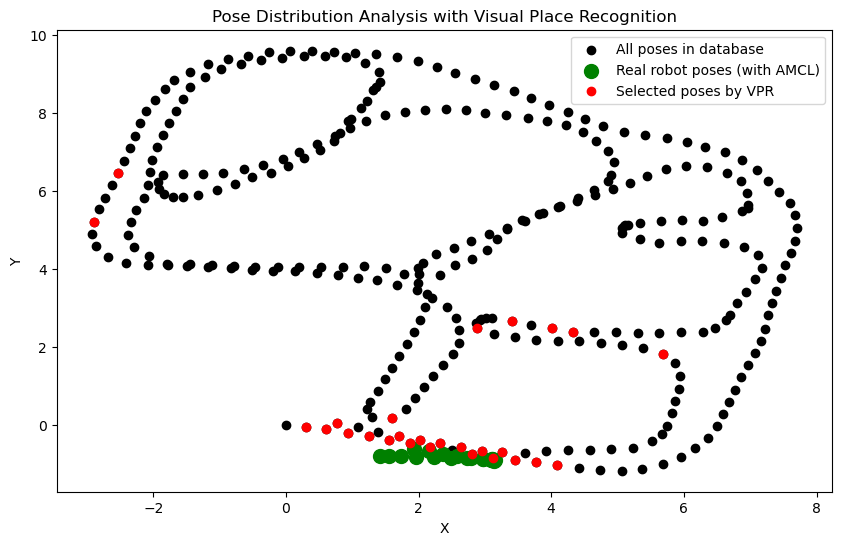

[ 2.15046848  0.52250461  0.01        0.          0.         -0.09573251
  0.9954071 ]
1/1 [==============================] - 0s 18ms/step
Predict: 70.0 ms
1/1 [==============================] - 0s 21ms/step
Predict: 101.0 ms
1/1 [==============================] - 0s 18ms/step
Predict: 88.0 ms
1/1 [==============================] - 0s 19ms/step
Predict: 82.0 ms
1/1 [==============================] - 0s 18ms/step
Predict: 80.0 ms
1/1 [==============================] - 0s 19ms/step
Predict: 81.0 ms
1/1 [==============================] - 0s 26ms/step
Predict: 84.0 ms
1/1 [==============================] - 0s 25ms/step
Predict: 87.0 ms
1/1 [==============================] - 0s 27ms/step
Predict: 88.0 ms
1/1 [==============================] - 0s 29ms/step
Predict: 102.0 ms
1/1 [==============================] - 0s 20ms/step
Predict: 83.0 ms
1/1 [==============================] - 0s 28ms/step
Predict: 91.0 ms
1/1 [==============================] - 0s 29ms/step
Predict: 84.0 ms
1/1 [=========

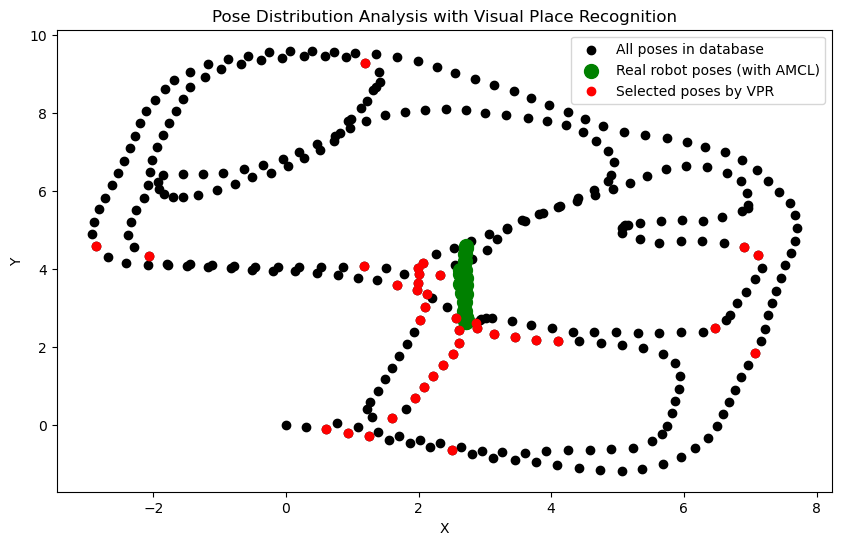

[ 2.46690655  2.63925169  0.01        0.          0.         -0.58342699
  0.81216559]
1/1 [==============================] - 0s 23ms/step
Predict: 85.0 ms
1/1 [==============================] - 0s 24ms/step
Predict: 76.0 ms
1/1 [==============================] - 0s 25ms/step
Predict: 77.0 ms
1/1 [==============================] - 0s 19ms/step
Predict: 78.0 ms
1/1 [==============================] - 0s 26ms/step
Predict: 78.0 ms
1/1 [==============================] - 0s 20ms/step
Predict: 82.0 ms
1/1 [==============================] - 0s 19ms/step
Predict: 79.0 ms
1/1 [==============================] - 0s 20ms/step
Predict: 83.0 ms
1/1 [==============================] - 0s 19ms/step
Predict: 77.0 ms
1/1 [==============================] - 0s 19ms/step
Predict: 88.0 ms
1/1 [==============================] - 0s 22ms/step
Predict: 77.0 ms
1/1 [==============================] - 0s 19ms/step
Predict: 78.0 ms
1/1 [==============================] - 0s 26ms/step
Predict: 78.0 ms
1/1 [===========

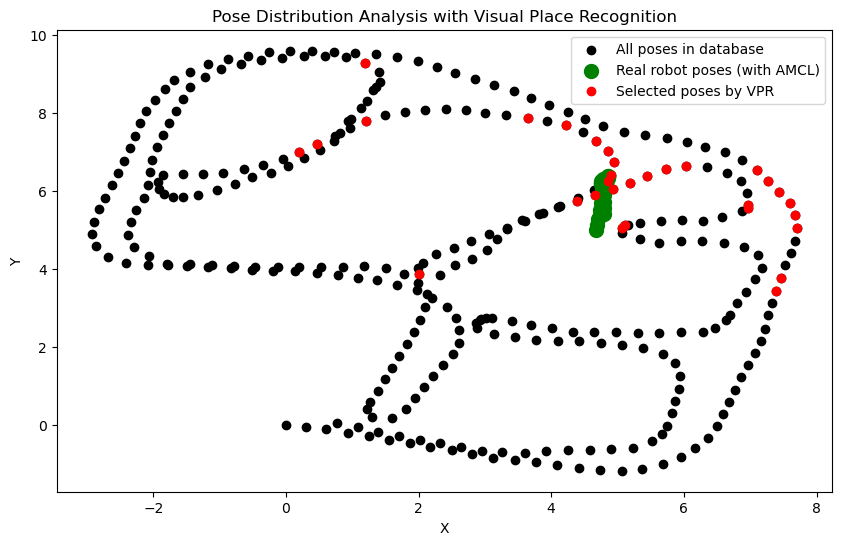

[5.07450651 6.14365911 0.01       0.         0.         0.2528899
 0.96749506]
1/1 [==============================] - 0s 22ms/step
Predict: 58.0 ms
1/1 [==============================] - 0s 19ms/step
Predict: 56.0 ms
1/1 [==============================] - 0s 17ms/step
Predict: 56.0 ms
1/1 [==============================] - 0s 22ms/step
Predict: 55.0 ms
1/1 [==============================] - 0s 19ms/step
Predict: 57.0 ms
1/1 [==============================] - 0s 29ms/step
Predict: 60.0 ms
1/1 [==============================] - 0s 21ms/step
Predict: 61.0 ms
1/1 [==============================] - 0s 21ms/step
Predict: 83.0 ms
1/1 [==============================] - 0s 18ms/step
Predict: 58.0 ms
1/1 [==============================] - 0s 25ms/step
Predict: 54.0 ms
1/1 [==============================] - 0s 22ms/step
Predict: 56.0 ms
1/1 [==============================] - 0s 21ms/step
Predict: 60.0 ms
1/1 [==============================] - 0s 22ms/step
Predict: 58.0 ms
1/1 [===================

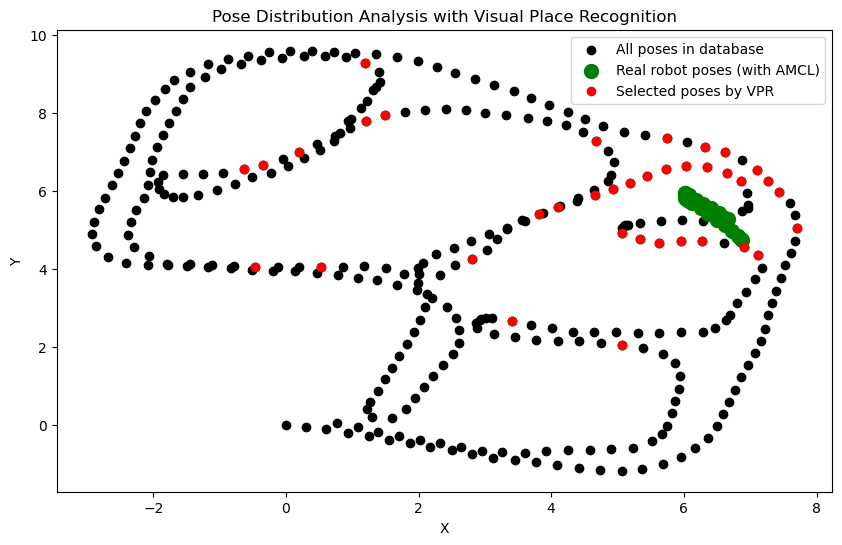

[4.5771004  5.83300711 0.01       0.         0.         0.47443162
 0.88029236]
1/1 [==============================] - 0s 27ms/step
Predict: 64.0 ms
1/1 [==============================] - 0s 25ms/step
Predict: 63.0 ms
1/1 [==============================] - 0s 19ms/step
Predict: 66.0 ms
1/1 [==============================] - 0s 25ms/step
Predict: 62.0 ms
1/1 [==============================] - 0s 17ms/step
Predict: 62.0 ms
1/1 [==============================] - 0s 26ms/step
Predict: 63.0 ms
1/1 [==============================] - 0s 20ms/step
Predict: 65.0 ms
1/1 [==============================] - 0s 20ms/step
Predict: 63.0 ms
1/1 [==============================] - 0s 19ms/step
Predict: 69.0 ms
1/1 [==============================] - 0s 26ms/step
Predict: 62.0 ms
1/1 [==============================] - 0s 19ms/step
Predict: 67.0 ms
1/1 [==============================] - 0s 24ms/step
Predict: 72.0 ms
1/1 [==============================] - 0s 17ms/step
Predict: 69.0 ms
1/1 [==================

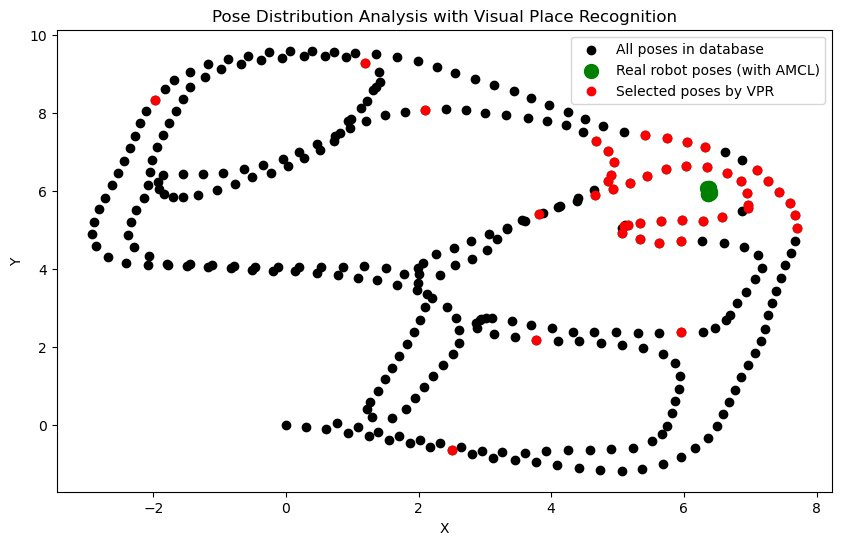

[ 5.4379157   5.83921634  0.01        0.          0.         -0.85107607
  0.5250424 ]
1/1 [==============================] - 0s 32ms/step
Predict: 73.0 ms
1/1 [==============================] - 0s 17ms/step
Predict: 65.0 ms
1/1 [==============================] - 0s 18ms/step
Predict: 65.0 ms
1/1 [==============================] - 0s 26ms/step
Predict: 64.0 ms
1/1 [==============================] - 0s 17ms/step
Predict: 68.0 ms
1/1 [==============================] - 0s 19ms/step
Predict: 64.0 ms
1/1 [==============================] - 0s 22ms/step
Predict: 69.0 ms
1/1 [==============================] - 0s 20ms/step
Predict: 64.0 ms
1/1 [==============================] - 0s 28ms/step
Predict: 69.0 ms
1/1 [==============================] - 0s 20ms/step
Predict: 68.0 ms
1/1 [==============================] - 0s 20ms/step
Predict: 72.0 ms
1/1 [==============================] - 0s 17ms/step
Predict: 70.0 ms
1/1 [==============================] - 0s 20ms/step
Predict: 66.0 ms
1/1 [===========

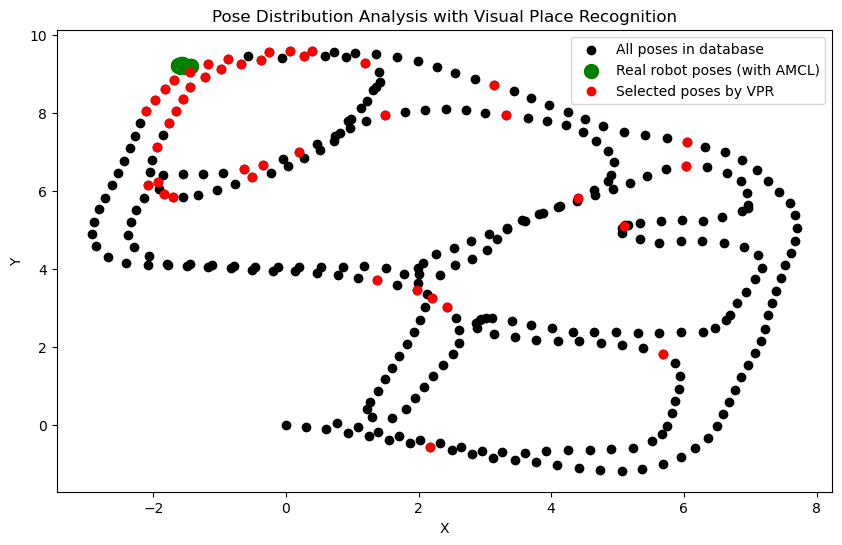

[ 0.3674835   7.15858022  0.01        0.          0.         -0.16244193
  0.9867181 ]
1/1 [==============================] - 0s 26ms/step
Predict: 81.0 ms
1/1 [==============================] - 0s 20ms/step
Predict: 116.0 ms
1/1 [==============================] - 0s 19ms/step
Predict: 90.0 ms
1/1 [==============================] - 0s 25ms/step
Predict: 94.0 ms
1/1 [==============================] - 0s 20ms/step
Predict: 88.0 ms
1/1 [==============================] - 0s 26ms/step
Predict: 92.0 ms
1/1 [==============================] - 0s 27ms/step
Predict: 89.0 ms
1/1 [==============================] - 0s 21ms/step
Predict: 87.0 ms
1/1 [==============================] - 0s 28ms/step
Predict: 93.0 ms
1/1 [==============================] - 0s 21ms/step
Predict: 87.0 ms
1/1 [==============================] - 0s 27ms/step
Predict: 89.0 ms
1/1 [==============================] - 0s 27ms/step
Predict: 91.0 ms
1/1 [==============================] - 0s 25ms/step
Predict: 92.0 ms
1/1 [==========

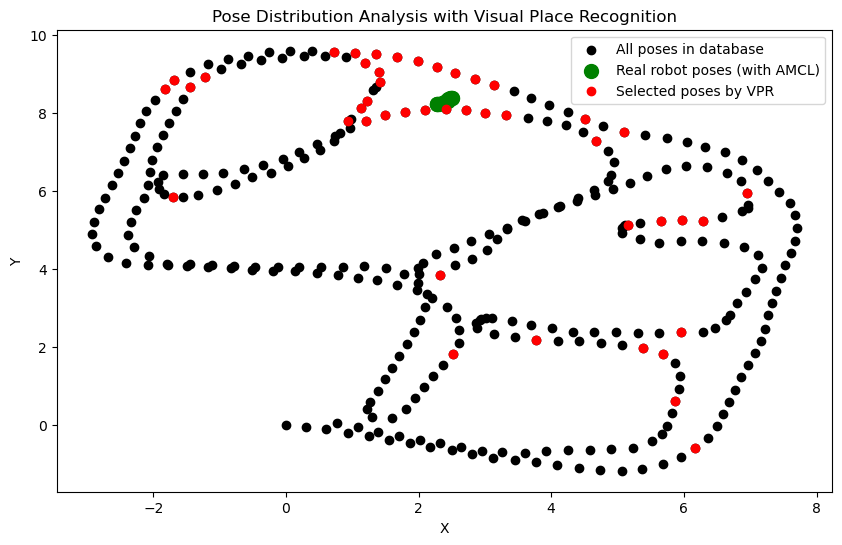

[ 2.65969064  6.88838627  0.01        0.          0.         -0.23708724
  0.97148836]
1/1 [==============================] - 0s 27ms/step
Predict: 97.0 ms
1/1 [==============================] - 0s 27ms/step
Predict: 85.0 ms
1/1 [==============================] - 0s 20ms/step
Predict: 84.0 ms
1/1 [==============================] - 0s 23ms/step
Predict: 88.0 ms
1/1 [==============================] - 0s 23ms/step
Predict: 89.0 ms
1/1 [==============================] - 0s 20ms/step
Predict: 82.0 ms
1/1 [==============================] - 0s 28ms/step
Predict: 83.0 ms
1/1 [==============================] - 0s 21ms/step
Predict: 78.0 ms
1/1 [==============================] - 0s 24ms/step
Predict: 88.0 ms
1/1 [==============================] - 0s 28ms/step
Predict: 109.0 ms
1/1 [==============================] - 0s 22ms/step
Predict: 94.0 ms
1/1 [==============================] - 0s 28ms/step
Predict: 89.0 ms
Sum predict time:  1.0658314228057861
ResNet: 1.098 seconds
Centroid:  0.0 seconds
T

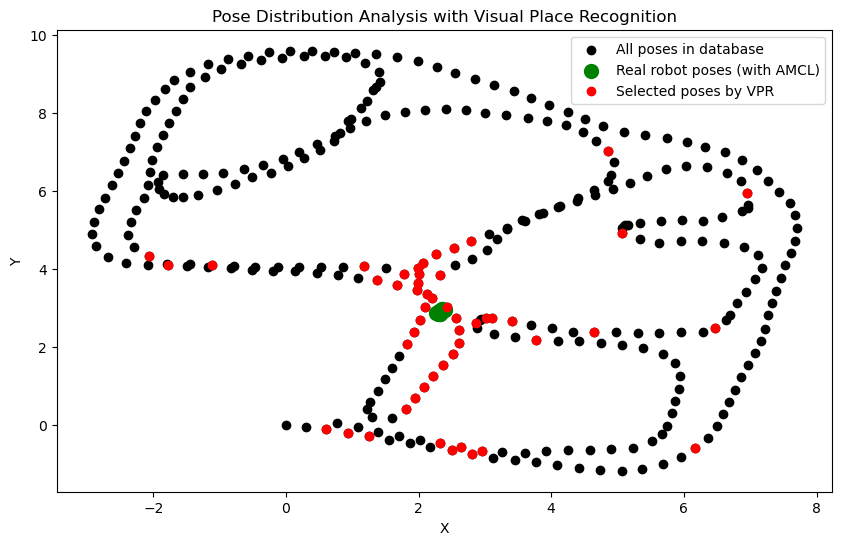

[ 2.40534577  2.53999962  0.01        0.          0.         -0.61302097
  0.79006664]
1/1 [==============================] - 0s 25ms/step
Predict: 92.0 ms
1/1 [==============================] - 0s 23ms/step
Predict: 80.0 ms
1/1 [==============================] - 0s 27ms/step
Predict: 87.0 ms
1/1 [==============================] - 0s 26ms/step
Predict: 84.0 ms
1/1 [==============================] - 0s 21ms/step
Predict: 85.0 ms
1/1 [==============================] - 0s 19ms/step
Predict: 83.0 ms
1/1 [==============================] - 0s 18ms/step
Predict: 81.0 ms
1/1 [==============================] - 0s 20ms/step
Predict: 77.0 ms
1/1 [==============================] - 0s 21ms/step
Predict: 92.0 ms
1/1 [==============================] - 0s 22ms/step
Predict: 83.0 ms
1/1 [==============================] - 0s 23ms/step
Predict: 84.0 ms
1/1 [==============================] - 0s 22ms/step
Predict: 82.0 ms
Sum predict time:  1.0081768035888672
ResNet: 1.044 seconds
Centroid:  0.001 seconds


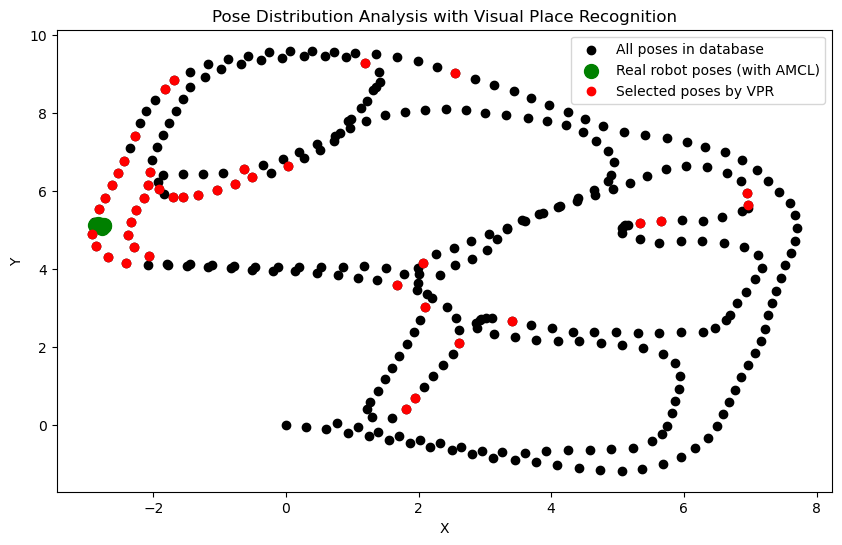

[-0.29922886  5.45136065  0.01        0.          0.         -0.19314418
  0.98117039]
1/1 [==============================] - 0s 27ms/step
Predict: 119.0 ms
1/1 [==============================] - 0s 25ms/step
Predict: 78.0 ms
1/1 [==============================] - 0s 25ms/step
Predict: 79.0 ms
1/1 [==============================] - 0s 22ms/step
Predict: 81.0 ms
1/1 [==============================] - 0s 20ms/step
Predict: 105.0 ms
1/1 [==============================] - 0s 26ms/step
Predict: 89.0 ms
1/1 [==============================] - 0s 19ms/step
Predict: 87.0 ms
1/1 [==============================] - 0s 20ms/step
Predict: 77.0 ms
1/1 [==============================] - 0s 19ms/step
Predict: 85.0 ms
1/1 [==============================] - 0s 19ms/step
Predict: 82.0 ms
1/1 [==============================] - 0s 24ms/step
Predict: 82.0 ms
1/1 [==============================] - 0s 32ms/step
Predict: 80.0 ms
1/1 [==============================] - 0s 21ms/step
Predict: 83.0 ms
Sum predict ti

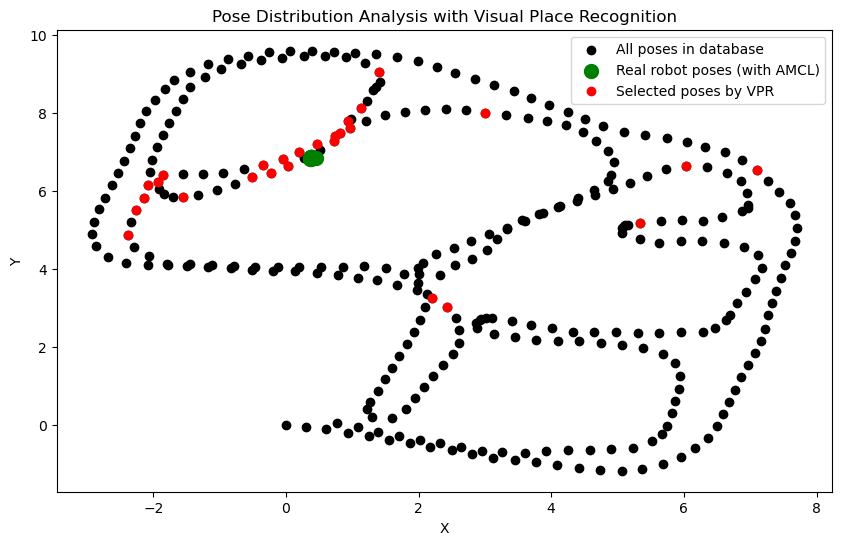

[0.67268024 6.5006855  0.01       0.         0.         0.65206614
 0.75816209]


In [14]:
FILTER = False
EPS = 0.9
MIN_SAMPLES = 10
N = 5

def load_images(image_reloc_path):
    image_list = [f for f in os.listdir(image_reloc_path) if f.endswith('.jpg') or f.endswith('.png')]
    query_images_resnet = [kimage.load_img(image_reloc_path + image_name, target_size=(224, 224)) for image_name in image_list]
    return query_images_resnet

def process_resnet(query_images_resnet, resnet, resnet_dataset):
    top_indices_all_queries = []
    first_image_indices = []
    last_image_indices = []
    sum_predict_time = 0
    for i,image_reloc in enumerate(query_images_resnet):
    
        start_time = time.time()
        img_data = preprocess_input(np.expand_dims(kimage.img_to_array(image_reloc), axis=0))
        end_time = time.time()
        #print(f"Preprocess input: {round(end_time - start_time, 3)*1000} ms")
        
        start_time = time.time()
        resnet_feature = resnet.predict(img_data)
        end_time = time.time()
        print(f"Predict: {round(end_time - start_time, 3)*1000} ms")
        sum_predict_time += end_time - start_time
        
        start_time = time.time()
        similarities = np.array([np.linalg.norm(resnet_feature - db_feature) for db_feature in resnet_dataset[:, 8:]])
        end_time = time.time()
        #print(f"Similarities: {round(end_time - start_time, 3)*1000} ms")
        top_indices = similarities.argsort()[:N]
        if i == 0:
            first_image_indices = top_indices
        elif i == len(query_images_resnet) - 1:
            last_image_indices = top_indices
        
        start_time = time.time()
        top_indices_all_queries.extend(top_indices)
        end_time = time.time()
        #print(f"Top indices: {round(end_time - start_time, 3)*1000} ms")

    print('Sum predict time: ', sum_predict_time) 
    return list(set(top_indices_all_queries)), first_image_indices, last_image_indices

def filter_dbscan(filtered_dataset, top_indices_all_queries):
    minimum_sample = MIN_SAMPLES
    result = np.array([])
    
    while minimum_sample > 0 and len(result) == 0:
        clustering = DBSCAN(eps=EPS, min_samples=minimum_sample).fit(filtered_dataset[top_indices_all_queries][:, 1:3])
        result = np.array(top_indices_all_queries)[clustering.labels_ != -1]
        minimum_sample -= 1  # decrease minimum_sample

    return result

def plot_results(filtered_dataset, top_indices_all_queries, best_match_pose, num_test,real_poses):
    plt.figure(figsize=(10, 6))
    plt.scatter(filtered_dataset[:, 1], filtered_dataset[:, 2], color='black', label='All poses in database')
    
    plt.scatter(real_poses[:, 1].astype(float), real_poses[:, 2].astype(float), color='green',s=100, label='Real robot poses (with AMCL)')
    if FILTER:
        plt.scatter(best_match_pose[0], best_match_pose[1], color='blue',s=100,marker='x', label='Predicted pose (centroid of cluster)')
        plt.title(f'Pose Distribution Analysis with Visual Place Recognition and DBSCAN')
        plt.scatter(filtered_dataset[top_indices_all_queries][:, 1], filtered_dataset[top_indices_all_queries][:, 2], color='red', label='Selected poses by VPR and DBSCAN')
    else:
        #plt.scatter(best_match_pose[0], best_match_pose[1], color='blue',s=100,marker='x', label='Predicted pose')
        plt.title(f'Pose Distribution Analysis with Visual Place Recognition')    
        plt.scatter(filtered_dataset[top_indices_all_queries][:, 1], filtered_dataset[top_indices_all_queries][:, 2], color='red', label='Selected poses by VPR')   
    plt.legend()
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.show()
    print(best_match_pose)
    
def calculate_centroid(filtered_dataset, top_indices_all_queries, first_query_indices, last_query_indices):
    # Get the positions and orientations of the top_indices_all_queries
    centroid_pose = np.mean(filtered_dataset[top_indices_all_queries][:, 1:8], axis=0)
    positions = filtered_dataset[top_indices_all_queries][:, 1:4]

    # Find the intersection of first_query_indices and last_query_indices with top_indices_all_queries
    first_query_indices = set(first_query_indices).intersection(top_indices_all_queries)
    last_query_indices = set(last_query_indices).intersection(top_indices_all_queries)

    # If both first_query_indices and last_query_indices are empty, use all orientations
    if not first_query_indices and not last_query_indices:
        orientations = filtered_dataset[top_indices_all_queries][:, 4:8]
    else:
        # Get the orientations of the intersected indices
        first_query_orientations = filtered_dataset[list(first_query_indices)][:, 4:8]
        last_query_orientations = filtered_dataset[list(last_query_indices)][:, 4:8]
        orientations = np.concatenate((first_query_orientations, last_query_orientations))
    # Convert the quaternions to Euler angles
    euler_angles = []
    for orientation in orientations:
        rotation = R.from_quat(orientation)
        euler_angles.append(rotation.as_euler('zyx'))

    # Calculate the mean of the z-axis rotation
    mean_z_rotation = np.mean([angle[0] for angle in euler_angles])

    # Convert the mean z-axis rotation back to a quaternion
    mean_rotation = R.from_euler('zyx', [mean_z_rotation, 0, 0])
    mean_quaternion = mean_rotation.as_quat()

    # Combine the centroid position and mean quaternion to form the centroid pose
    centroid_pose[3:8] = mean_quaternion
    return centroid_pose

if __name__ == "__main__":
    # Initialize models and datasets
    resnet_dataset = np.load(dataset_processed_path + 'resnet.npy')
    filtered_dataset = np.load(dataset_processed_path + 'filtered_dataset_v2.npy')

    for num_test in range(1, 15):
        # Load images
        image_reloc_path = f'/home/simone/tesi_ws/src/relocalization_pkg/reloc_test/test_{num_test}/'
        query_images_resnet = load_images(image_reloc_path)

        # ResNet processing
        start_time_resnet = time.time()
        top_indices_all_queries, first_query_indices, last_query_indices = process_resnet(query_images_resnet, resnet, resnet_dataset)

        # DBSCAN filtering
        if FILTER:
            top_indices_all_queries = filter_dbscan(filtered_dataset, top_indices_all_queries)
        end_time_resnet = time.time()

        # Calculate centroid of the cluster of candidate poses
        start_time_sift = time.time()
        best_match_pose = calculate_centroid(filtered_dataset, top_indices_all_queries, first_query_indices, last_query_indices)
        #best_match_pose = process_sift(query_images_sift, sift, bf, sift_dataset, top_indices_all_queries, filtered_dataset)
        end_time_sift = time.time()

        # Print elapsed times
        print(f"ResNet: {round(end_time_resnet - start_time_resnet, 3)} seconds")
        print(f"Centroid:  {round(end_time_sift - start_time_sift, 3)} seconds") 
        print(f"TOTAL: {round(end_time_sift - start_time_resnet, 3)} seconds")

        # Plot results
        real_poses = np.load(image_reloc_path + 'pose_array_v2.npy')
        print(f'Last pose: {real_poses[-1]}')
        plot_results(filtered_dataset, top_indices_all_queries, best_match_pose, num_test, real_poses)

# Relocalization using VGG19

In [15]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.cluster import DBSCAN
from tensorflow.keras.applications.vgg19 import VGG19, preprocess_input
from tensorflow.keras.preprocessing import image as kimage
from scipy.spatial.transform import Rotation as R
import os
import time

vgg19 = VGG19(weights='imagenet', include_top=False, input_shape=(224, 224, 3), pooling='avg')
dataset_processed_path = '/home/simone/tesi_ws/src/create_dataset/create_dataset/dataset_processed_v2/'
dataset_file = 'filtered_dataset_v2.npy'
dataset_array = np.load(dataset_processed_path + dataset_file)
dataset_array[:2]

array([[ 0.00000000e+00,  1.26900955e-06, -1.88639280e-07,
         1.00000000e-02,  0.00000000e+00,  0.00000000e+00,
        -7.23014980e-02,  9.97382822e-01],
       [ 5.40000000e+01,  2.95406354e-01, -4.50266366e-02,
         1.00000000e-02,  0.00000000e+00,  0.00000000e+00,
        -7.90274330e-02,  9.96872442e-01]])

1/1 [==============================] - 0s 103ms/step
Similarities: 1.0 ms
1/1 [==============================] - 0s 15ms/step
Similarities: 1.0 ms
1/1 [==============================] - 0s 17ms/step
Similarities: 1.0 ms
1/1 [==============================] - 0s 16ms/step
Similarities: 1.0 ms
1/1 [==============================] - 0s 18ms/step
Similarities: 1.0 ms
1/1 [==============================] - 0s 16ms/step
Similarities: 1.0 ms
1/1 [==============================] - 0s 17ms/step
Similarities: 2.0 ms
1/1 [==============================] - 0s 17ms/step
Similarities: 2.0 ms
1/1 [==============================] - 0s 15ms/step
Similarities: 2.0 ms
1/1 [==============================] - 0s 15ms/step
Similarities: 1.0 ms
1/1 [==============================] - 0s 15ms/step
Similarities: 2.0 ms
1/1 [==============================] - 0s 18ms/step
Similarities: 2.0 ms
1/1 [==============================] - 0s 15ms/step
Similarities: 2.0 ms
1/1 [==============================] - 0s 15ms/ste

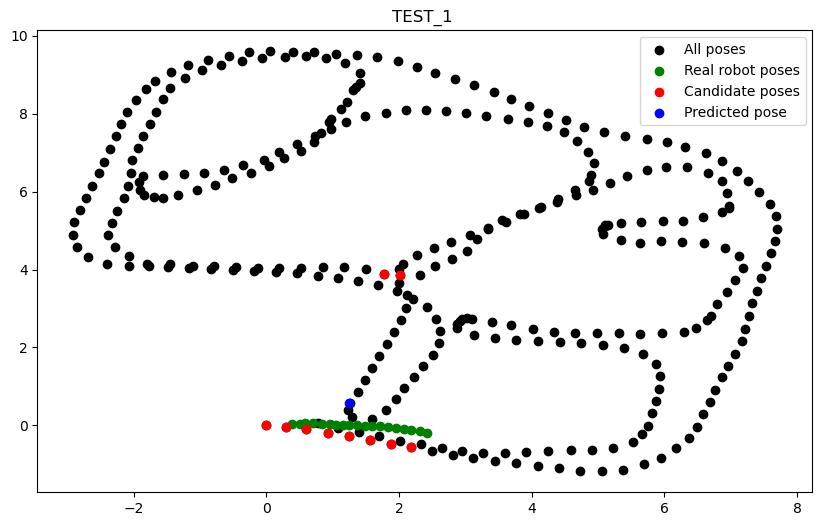

[ 1.24704458  0.56981501  0.01        0.          0.         -0.1491036
  0.98882158]
1/1 [==============================] - 0s 18ms/step
Similarities: 2.0 ms
1/1 [==============================] - 0s 14ms/step
Similarities: 1.0 ms
1/1 [==============================] - 0s 17ms/step
Similarities: 1.0 ms
1/1 [==============================] - 0s 15ms/step
Similarities: 2.0 ms
1/1 [==============================] - 0s 17ms/step
Similarities: 2.0 ms
1/1 [==============================] - 0s 17ms/step
Similarities: 2.0 ms
1/1 [==============================] - 0s 16ms/step
Similarities: 1.0 ms
1/1 [==============================] - 0s 15ms/step
Similarities: 1.0 ms
1/1 [==============================] - 0s 24ms/step
Similarities: 1.0 ms
1/1 [==============================] - 0s 18ms/step
Similarities: 2.0 ms
1/1 [==============================] - 0s 15ms/step
Similarities: 2.0 ms
1/1 [==============================] - 0s 14ms/step
Similarities: 1.0 ms
1/1 [==============================] -

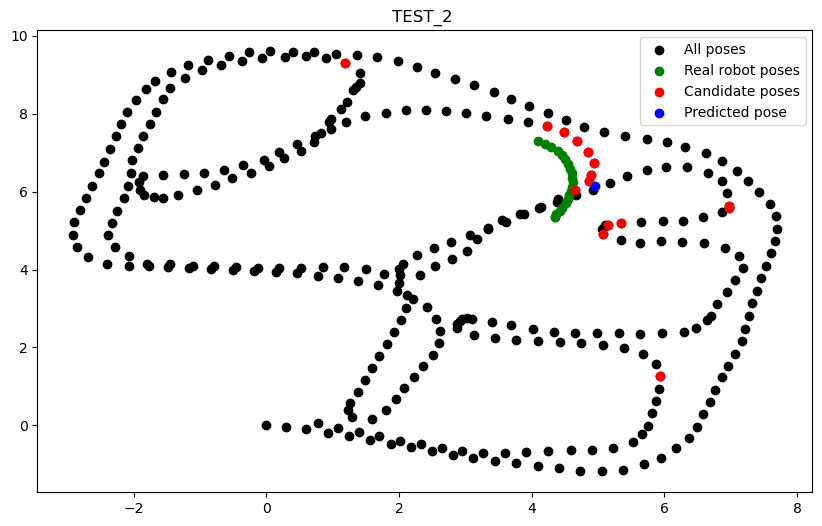

[ 4.94879669  6.1327631   0.01        0.          0.         -0.63117412
  0.77564117]
1/1 [==============================] - 0s 16ms/step
Similarities: 2.0 ms
1/1 [==============================] - 0s 17ms/step
Similarities: 1.0 ms
1/1 [==============================] - 0s 17ms/step
Similarities: 2.0 ms
1/1 [==============================] - 0s 25ms/step
Similarities: 1.0 ms
1/1 [==============================] - 0s 17ms/step
Similarities: 1.0 ms
1/1 [==============================] - 0s 16ms/step
Similarities: 2.0 ms
1/1 [==============================] - 0s 15ms/step
Similarities: 1.0 ms
1/1 [==============================] - 0s 15ms/step
Similarities: 1.0 ms
1/1 [==============================] - 0s 17ms/step
Similarities: 1.0 ms
1/1 [==============================] - 0s 20ms/step
Similarities: 1.0 ms
1/1 [==============================] - 0s 18ms/step
Similarities: 1.0 ms
1/1 [==============================] - 0s 19ms/step
Similarities: 2.0 ms
1/1 [==============================] 

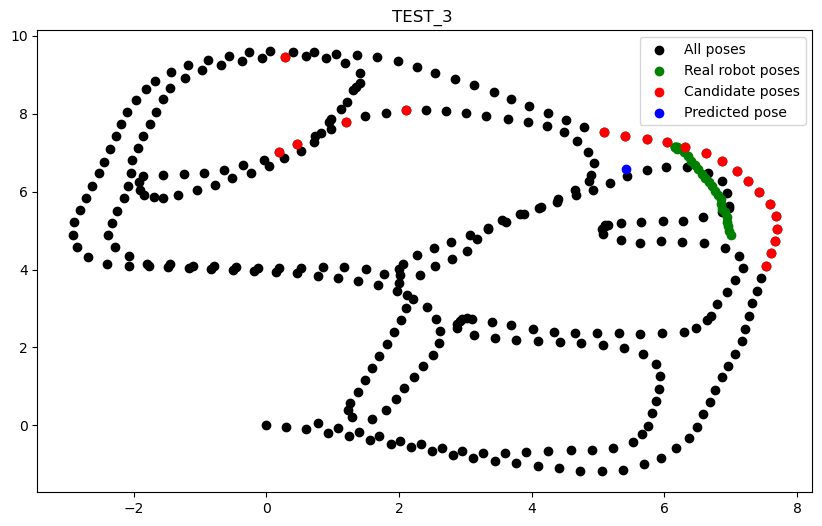

[5.4254217  6.58354082 0.01       0.         0.         0.7785302
 0.62760714]
1/1 [==============================] - 0s 17ms/step
Similarities: 1.0 ms
1/1 [==============================] - 0s 16ms/step
Similarities: 2.0 ms
1/1 [==============================] - 0s 16ms/step
Similarities: 1.0 ms
1/1 [==============================] - 0s 17ms/step
Similarities: 2.0 ms
1/1 [==============================] - 0s 15ms/step
Similarities: 1.0 ms
1/1 [==============================] - 0s 16ms/step
Similarities: 2.0 ms
1/1 [==============================] - 0s 16ms/step
Similarities: 1.0 ms
1/1 [==============================] - 0s 16ms/step
Similarities: 1.0 ms
1/1 [==============================] - 0s 16ms/step
Similarities: 1.0 ms
1/1 [==============================] - 0s 18ms/step
Similarities: 2.0 ms
1/1 [==============================] - 0s 16ms/step
Similarities: 2.0 ms
1/1 [==============================] - 0s 17ms/step
Similarities: 1.0 ms
1/1 [==============================] - 0s 16m

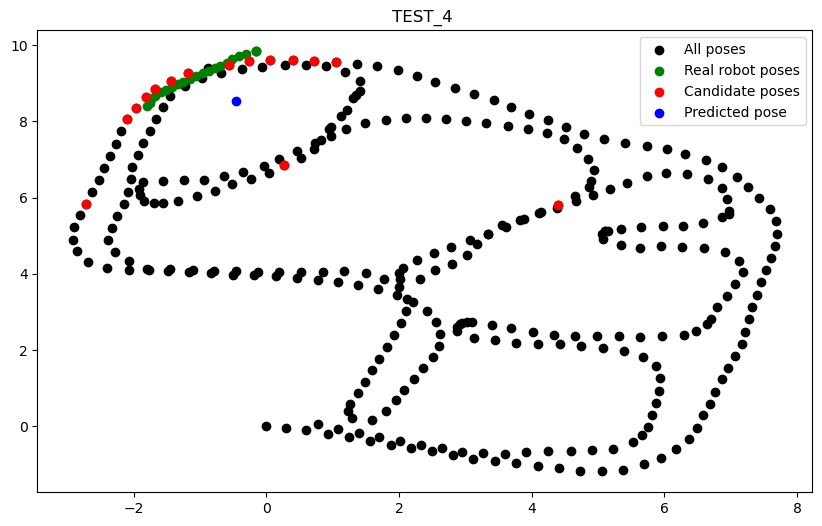

[-0.45804967  8.53700685  0.01        0.          0.         -0.40468476
  0.91445626]
1/1 [==============================] - 0s 21ms/step
Similarities: 2.0 ms
1/1 [==============================] - 0s 15ms/step
Similarities: 1.0 ms
1/1 [==============================] - 0s 14ms/step
Similarities: 1.0 ms
1/1 [==============================] - 0s 16ms/step
Similarities: 2.0 ms
1/1 [==============================] - 0s 18ms/step
Similarities: 2.0 ms
1/1 [==============================] - 0s 18ms/step
Similarities: 2.0 ms
1/1 [==============================] - 0s 18ms/step
Similarities: 1.0 ms
1/1 [==============================] - 0s 21ms/step
Similarities: 2.0 ms
1/1 [==============================] - 0s 17ms/step
Similarities: 1.0 ms
1/1 [==============================] - 0s 15ms/step
Similarities: 2.0 ms
1/1 [==============================] - 0s 15ms/step
Similarities: 1.0 ms
1/1 [==============================] - 0s 14ms/step
Similarities: 1.0 ms
1/1 [==============================] 

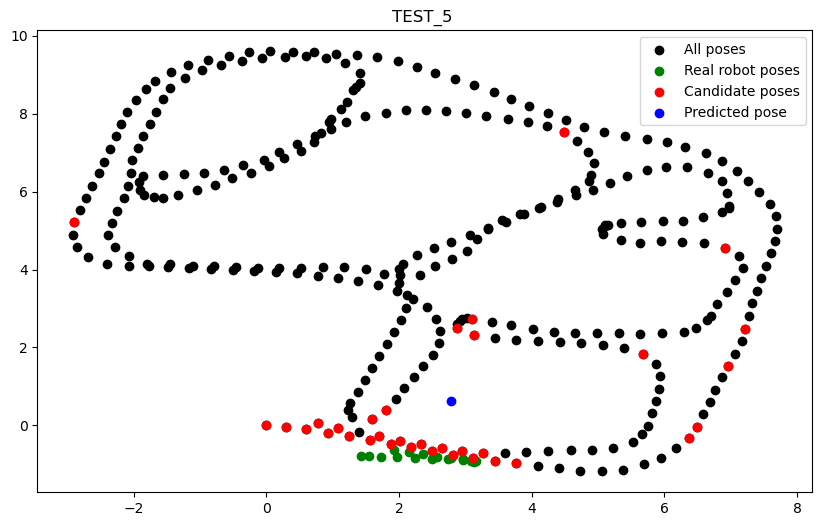

[ 2.7889306   0.63528759  0.01        0.          0.         -0.18491471
  0.98275457]
1/1 [==============================] - 0s 17ms/step
Similarities: 1.0 ms
1/1 [==============================] - 0s 14ms/step
Similarities: 2.0 ms
1/1 [==============================] - 0s 16ms/step
Similarities: 1.0 ms
1/1 [==============================] - 0s 14ms/step
Similarities: 1.0 ms
1/1 [==============================] - 0s 15ms/step
Similarities: 1.0 ms
1/1 [==============================] - 0s 14ms/step
Similarities: 1.0 ms
1/1 [==============================] - 0s 14ms/step
Similarities: 2.0 ms
1/1 [==============================] - 0s 15ms/step
Similarities: 2.0 ms
1/1 [==============================] - 0s 17ms/step
Similarities: 2.0 ms
1/1 [==============================] - 0s 17ms/step
Similarities: 1.0 ms
1/1 [==============================] - 0s 18ms/step
Similarities: 3.0 ms
1/1 [==============================] - 0s 17ms/step
Similarities: 1.0 ms
1/1 [==============================] 

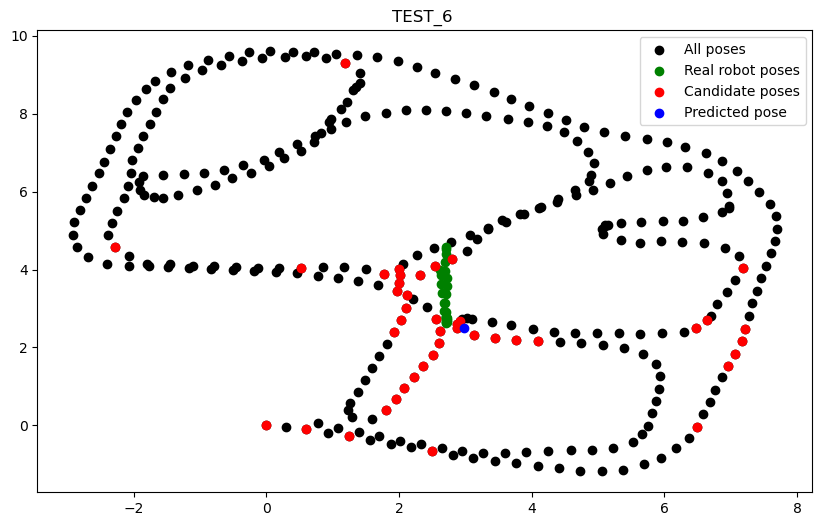

[ 2.9865036   2.49325423  0.01        0.          0.         -0.70793708
  0.7062755 ]
1/1 [==============================] - 0s 16ms/step
Similarities: 2.0 ms
1/1 [==============================] - 0s 14ms/step
Similarities: 1.0 ms
1/1 [==============================] - 0s 17ms/step
Similarities: 1.0 ms
1/1 [==============================] - 0s 16ms/step
Similarities: 1.0 ms
1/1 [==============================] - 0s 16ms/step
Similarities: 1.0 ms
1/1 [==============================] - 0s 14ms/step
Similarities: 1.0 ms
1/1 [==============================] - 0s 14ms/step
Similarities: 1.0 ms
1/1 [==============================] - 0s 15ms/step
Similarities: 2.0 ms
1/1 [==============================] - 0s 17ms/step
Similarities: 1.0 ms
1/1 [==============================] - 0s 19ms/step
Similarities: 1.0 ms
1/1 [==============================] - 0s 18ms/step
Similarities: 2.0 ms
1/1 [==============================] - 0s 16ms/step
Similarities: 1.0 ms
1/1 [==============================] 

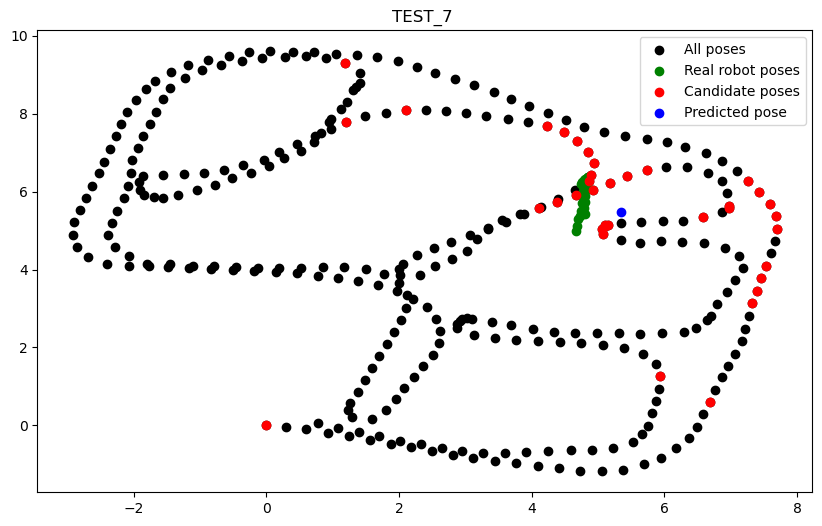

[ 5.3491483   5.49023605  0.01        0.          0.         -0.3714459
  0.9284546 ]
1/1 [==============================] - 0s 28ms/step
Similarities: 1.0 ms
1/1 [==============================] - 0s 14ms/step
Similarities: 1.0 ms
1/1 [==============================] - 0s 16ms/step
Similarities: 2.0 ms
1/1 [==============================] - 0s 14ms/step
Similarities: 1.0 ms
1/1 [==============================] - 0s 14ms/step
Similarities: 1.0 ms
1/1 [==============================] - 0s 18ms/step
Similarities: 1.0 ms
1/1 [==============================] - 0s 15ms/step
Similarities: 2.0 ms
1/1 [==============================] - 0s 16ms/step
Similarities: 2.0 ms
1/1 [==============================] - 0s 19ms/step
Similarities: 2.0 ms
1/1 [==============================] - 0s 17ms/step
Similarities: 2.0 ms
1/1 [==============================] - 0s 21ms/step
Similarities: 2.0 ms
1/1 [==============================] - 0s 15ms/step
Similarities: 1.0 ms
1/1 [==============================] -

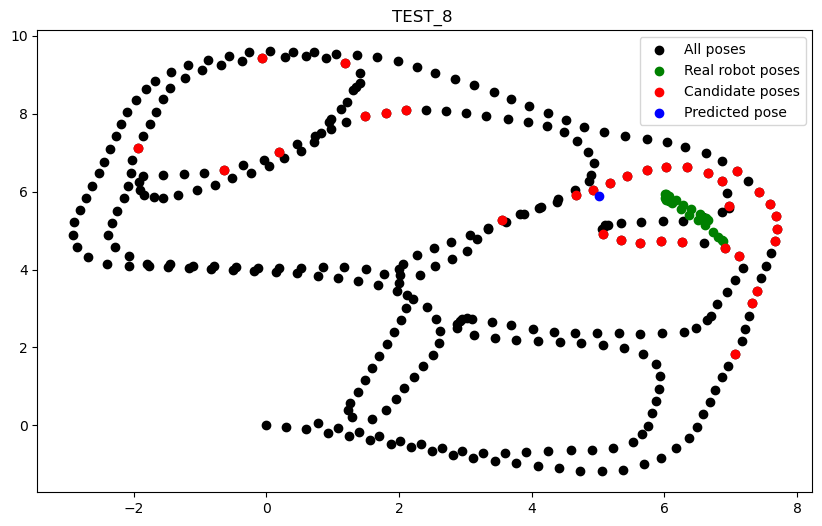

[5.02222746 5.88507691 0.01       0.         0.         0.44384751
 0.89610233]
1/1 [==============================] - 0s 15ms/step
Similarities: 1.0 ms
1/1 [==============================] - 0s 14ms/step
Similarities: 1.0 ms
1/1 [==============================] - 0s 14ms/step
Similarities: 1.0 ms
1/1 [==============================] - 0s 16ms/step
Similarities: 1.0 ms
1/1 [==============================] - 0s 14ms/step
Similarities: 1.0 ms
1/1 [==============================] - 0s 15ms/step
Similarities: 1.0 ms
1/1 [==============================] - 0s 15ms/step
Similarities: 1.0 ms
1/1 [==============================] - 0s 14ms/step
Similarities: 1.0 ms
1/1 [==============================] - 0s 16ms/step
Similarities: 2.0 ms
1/1 [==============================] - 0s 19ms/step
Similarities: 1.0 ms
1/1 [==============================] - 0s 17ms/step
Similarities: 5.0 ms
1/1 [==============================] - 0s 26ms/step
Similarities: 2.0 ms
1/1 [==============================] - 0s 16

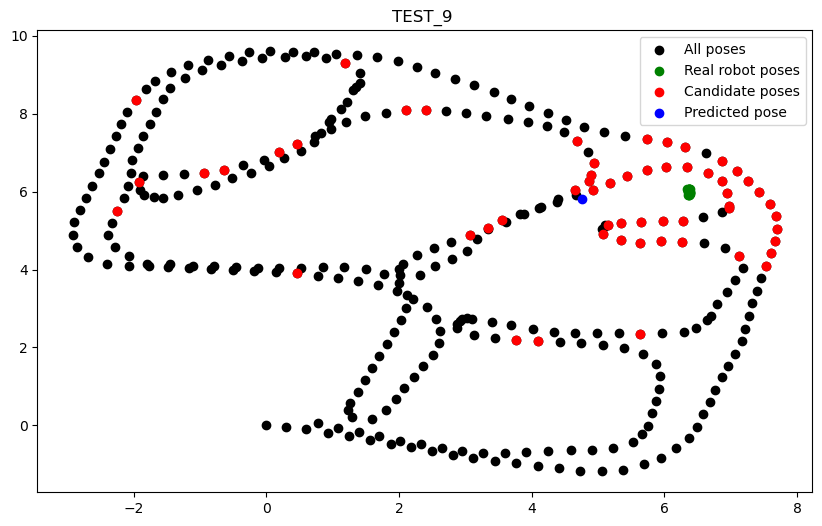

[ 4.75433708  5.80115281  0.01        0.          0.         -0.60713694
  0.79459722]
1/1 [==============================] - 0s 17ms/step
Similarities: 2.0 ms
1/1 [==============================] - 0s 16ms/step
Similarities: 1.0 ms
1/1 [==============================] - 0s 16ms/step
Similarities: 1.0 ms
1/1 [==============================] - 0s 16ms/step
Similarities: 2.0 ms
1/1 [==============================] - 0s 16ms/step
Similarities: 1.0 ms
1/1 [==============================] - 0s 15ms/step
Similarities: 1.0 ms
1/1 [==============================] - 0s 14ms/step
Similarities: 2.0 ms
1/1 [==============================] - 0s 15ms/step
Similarities: 2.0 ms
1/1 [==============================] - 0s 15ms/step
Similarities: 2.0 ms
1/1 [==============================] - 0s 18ms/step
Similarities: 1.0 ms
1/1 [==============================] - 0s 16ms/step
Similarities: 1.0 ms
1/1 [==============================] - 0s 17ms/step
Similarities: 2.0 ms
1/1 [==============================] 

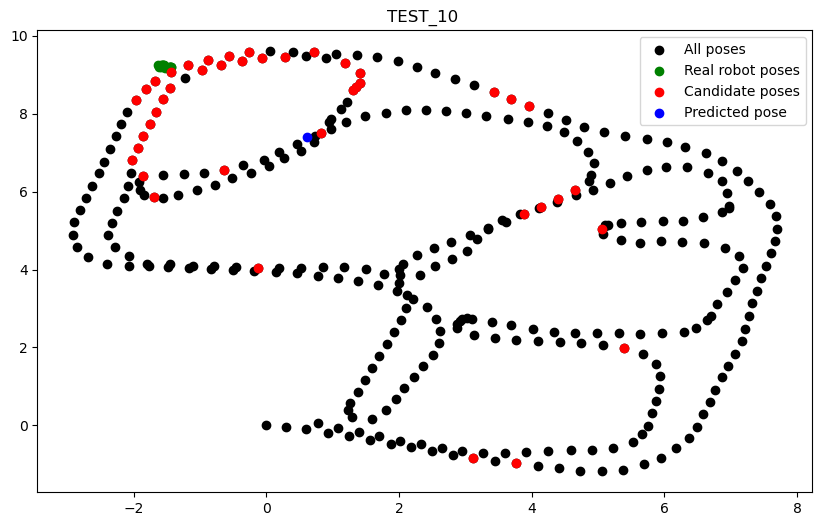

[ 0.60752375  7.40576425  0.01        0.          0.         -0.0139726
  0.99990238]
1/1 [==============================] - 0s 17ms/step
Similarities: 1.0 ms
1/1 [==============================] - 0s 16ms/step
Similarities: 2.0 ms
1/1 [==============================] - 0s 16ms/step
Similarities: 1.0 ms
1/1 [==============================] - 0s 15ms/step
Similarities: 1.0 ms
1/1 [==============================] - 0s 15ms/step
Similarities: 2.0 ms
1/1 [==============================] - 0s 15ms/step
Similarities: 1.0 ms
1/1 [==============================] - 0s 18ms/step
Similarities: 1.0 ms
1/1 [==============================] - 0s 16ms/step
Similarities: 1.0 ms
1/1 [==============================] - 0s 16ms/step
Similarities: 1.0 ms
1/1 [==============================] - 0s 17ms/step
Similarities: 2.0 ms
1/1 [==============================] - 0s 16ms/step
Similarities: 1.0 ms
1/1 [==============================] - 0s 16ms/step
Similarities: 2.0 ms
1/1 [==============================] -

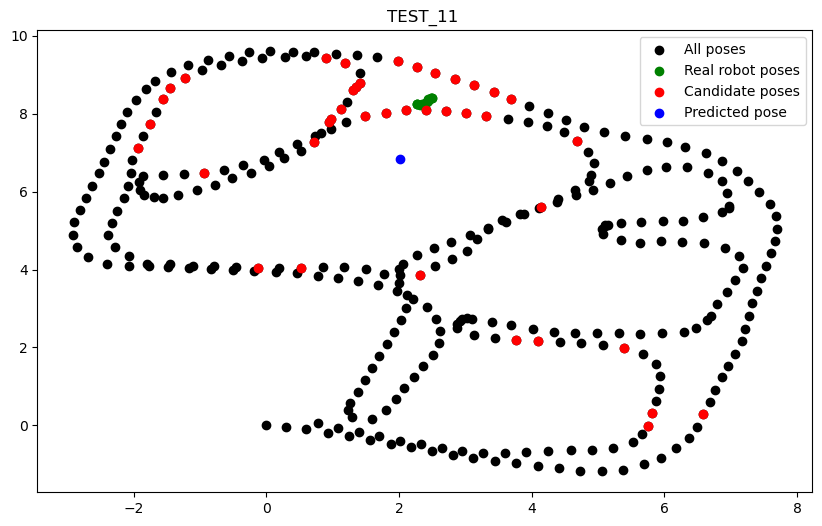

[2.01889423 6.8315546  0.01       0.         0.         0.67594704
 0.7369502 ]
1/1 [==============================] - 0s 17ms/step
Similarities: 2.0 ms
1/1 [==============================] - 0s 14ms/step
Similarities: 2.0 ms
1/1 [==============================] - 0s 15ms/step
Similarities: 1.0 ms
1/1 [==============================] - 0s 14ms/step
Similarities: 2.0 ms
1/1 [==============================] - 0s 16ms/step
Similarities: 2.0 ms
1/1 [==============================] - 0s 14ms/step
Similarities: 1.0 ms
1/1 [==============================] - 0s 15ms/step
Similarities: 1.0 ms
1/1 [==============================] - 0s 17ms/step
Similarities: 2.0 ms
1/1 [==============================] - 0s 19ms/step
Similarities: 1.0 ms
1/1 [==============================] - 0s 16ms/step
Similarities: 1.0 ms
1/1 [==============================] - 0s 15ms/step
Similarities: 1.0 ms
1/1 [==============================] - 0s 17ms/step
Similarities: 1.0 ms
Sum predict time:  0.8878681659698486
VGG19:

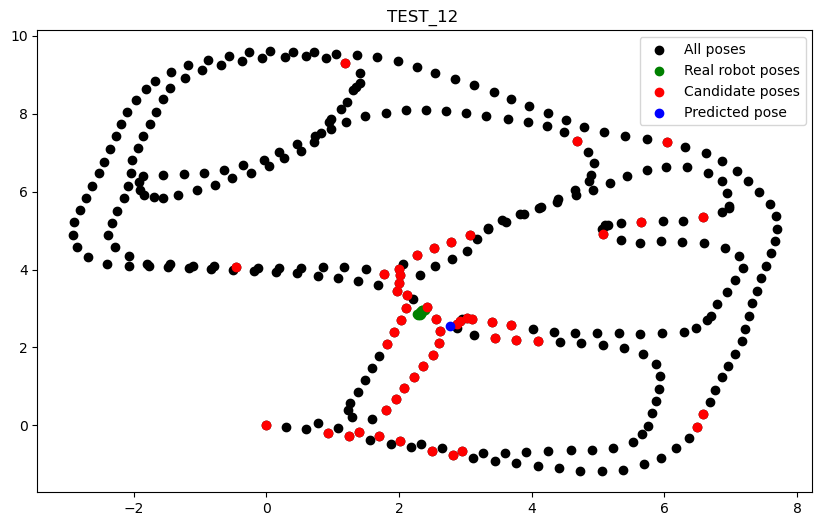

[ 2.769592    2.56312937  0.01        0.          0.         -0.13492827
  0.99085537]
1/1 [==============================] - 0s 18ms/step
Similarities: 2.0 ms
1/1 [==============================] - 0s 14ms/step
Similarities: 1.0 ms
1/1 [==============================] - 0s 17ms/step
Similarities: 1.0 ms
1/1 [==============================] - 0s 17ms/step
Similarities: 1.0 ms
1/1 [==============================] - 0s 15ms/step
Similarities: 1.0 ms
1/1 [==============================] - 0s 16ms/step
Similarities: 1.0 ms
1/1 [==============================] - 0s 14ms/step
Similarities: 1.0 ms
1/1 [==============================] - 0s 18ms/step
Similarities: 1.0 ms
1/1 [==============================] - 0s 18ms/step
Similarities: 1.0 ms
1/1 [==============================] - 0s 16ms/step
Similarities: 1.0 ms
1/1 [==============================] - 0s 16ms/step
Similarities: 1.0 ms
1/1 [==============================] - 0s 15ms/step
Similarities: 1.0 ms
Sum predict time:  0.8694696426391602

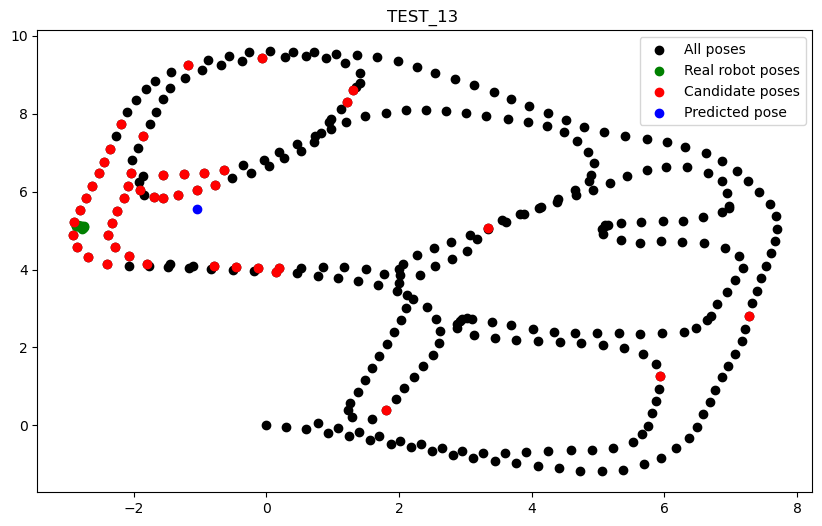

[-1.04022191  5.56395784  0.01        0.          0.          0.16322919
  0.98658818]
1/1 [==============================] - 0s 16ms/step
Similarities: 1.0 ms
1/1 [==============================] - 0s 15ms/step
Similarities: 1.0 ms
1/1 [==============================] - 0s 15ms/step
Similarities: 1.0 ms
1/1 [==============================] - 0s 17ms/step
Similarities: 2.0 ms
1/1 [==============================] - 0s 14ms/step
Similarities: 2.0 ms
1/1 [==============================] - 0s 16ms/step
Similarities: 2.0 ms
1/1 [==============================] - 0s 14ms/step
Similarities: 1.0 ms
1/1 [==============================] - 0s 14ms/step
Similarities: 2.0 ms
1/1 [==============================] - 0s 18ms/step
Similarities: 1.0 ms
1/1 [==============================] - 0s 15ms/step
Similarities: 2.0 ms
1/1 [==============================] - 0s 15ms/step
Similarities: 1.0 ms
1/1 [==============================] - 0s 16ms/step
Similarities: 2.0 ms
1/1 [==============================] 

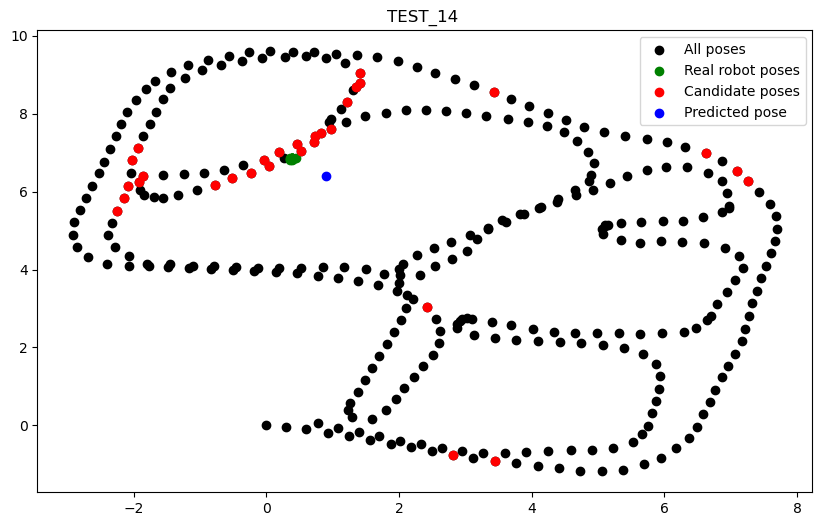

[0.90442538 6.40640027 0.01       0.         0.         0.55633746
 0.83095645]
1/1 [==============================] - 0s 36ms/step
Similarities: 1.0 ms
1/1 [==============================] - 0s 17ms/step
Similarities: 1.0 ms
1/1 [==============================] - 0s 17ms/step
Similarities: 1.0 ms
1/1 [==============================] - 0s 20ms/step
Similarities: 1.0 ms
1/1 [==============================] - 0s 18ms/step
Similarities: 1.0 ms
1/1 [==============================] - 0s 17ms/step
Similarities: 1.0 ms
1/1 [==============================] - 0s 18ms/step
Similarities: 2.0 ms
1/1 [==============================] - 0s 16ms/step
Similarities: 1.0 ms
1/1 [==============================] - 0s 17ms/step
Similarities: 1.0 ms
1/1 [==============================] - 0s 22ms/step
Similarities: 1.0 ms
1/1 [==============================] - 0s 21ms/step
Similarities: 1.0 ms
1/1 [==============================] - 0s 18ms/step
Similarities: 1.0 ms
1/1 [==============================] - 0s 18

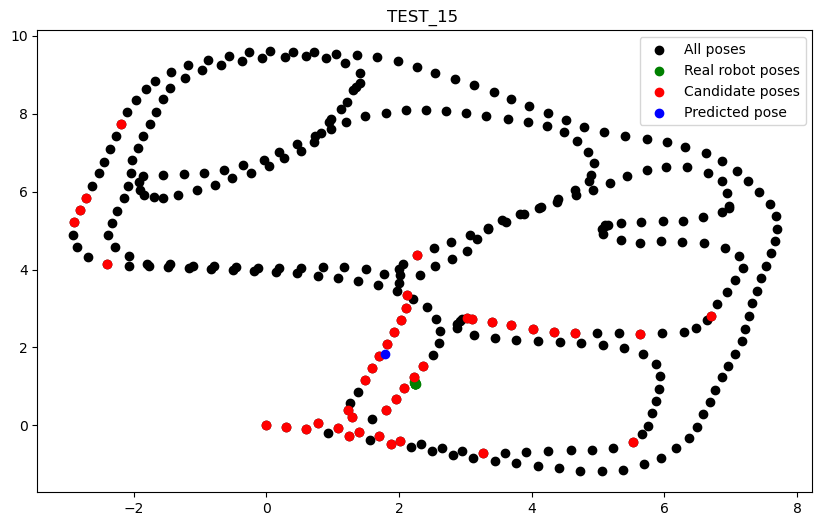

[1.79190743 1.82012982 0.01       0.         0.         0.74253871
 0.66980315]


In [16]:
FILTER = False
EPS = 0.9
MIN_SAMPLES = 20
N = 5

def load_images(image_reloc_path):
    image_list = [f for f in os.listdir(image_reloc_path) if f.endswith('.jpg') or f.endswith('.png')]
    query_images_resnet = [kimage.load_img(image_reloc_path + image_name, target_size=(224, 224)) for image_name in image_list]
    return query_images_resnet

def process_vgg19(query_images_vgg19, vgg19, vgg19_dataset):
    top_indices_all_queries = []
    first_image_indices = []
    last_image_indices = []
    sum_predict_time = 0
    for i,image_reloc in enumerate(query_images_vgg19):
    
        start_time = time.time()
        img_data = preprocess_input(np.expand_dims(kimage.img_to_array(image_reloc), axis=0))
        end_time = time.time()
        #print(f"Preprocess input: {round(end_time - start_time, 3)*1000} ms")
        
        start_time = time.time()
        vgg19_feature = vgg19.predict(img_data)
        end_time = time.time()
        #print(f"Predict: {round(end_time - start_time, 3)*1000} ms")
        sum_predict_time += end_time - start_time
        
        start_time = time.time()
        similarities = np.array([np.linalg.norm(vgg19_feature - db_feature) for db_feature in vgg19_dataset[:, 8:]])
        end_time = time.time()
        print(f"Similarities: {round(end_time - start_time, 3)*1000} ms")
        top_indices = similarities.argsort()[:N]
        if i == 0:
            first_image_indices = top_indices
        elif i == len(query_images_resnet) - 1:
            last_image_indices = top_indices
        
        start_time = time.time()
        top_indices_all_queries.extend(top_indices)
        end_time = time.time()
        #print(f"Top indices: {round(end_time - start_time, 3)*1000} ms")

    print('Sum predict time: ', sum_predict_time) 
    return list(set(top_indices_all_queries)), first_image_indices, last_image_indices

def filter_dbscan(filtered_dataset, top_indices_all_queries):
    minimum_sample = MIN_SAMPLES
    result = np.array([])
    
    while minimum_sample > 0 and len(result) == 0:
        clustering = DBSCAN(eps=EPS, min_samples=minimum_sample).fit(filtered_dataset[top_indices_all_queries][:, 1:3])
        result = np.array(top_indices_all_queries)[clustering.labels_ != -1]
        minimum_sample -= 1  # decrease minimum_sample

    return result

def plot_results(filtered_dataset, top_indices_all_queries, best_match_pose, num_test,real_poses):
    plt.figure(figsize=(10, 6))
    plt.scatter(filtered_dataset[:, 1], filtered_dataset[:, 2], color='black', label='All poses')
    plt.scatter(real_poses[:, 1].astype(float), real_poses[:, 2].astype(float), color='green', label='Real robot poses')
    plt.scatter(filtered_dataset[top_indices_all_queries][:, 1], filtered_dataset[top_indices_all_queries][:, 2], color='red', label='Candidate poses')
    plt.scatter(best_match_pose[0], best_match_pose[1], color='blue', label='Predicted pose')
    plt.title(f'TEST_{num_test} ')
    plt.legend()
    plt.show()
    print(best_match_pose)
    
def calculate_centroid(filtered_dataset, top_indices_all_queries, first_query_indices, last_query_indices):
    # Get the positions and orientations of the top_indices_all_queries
    centroid_pose = np.mean(filtered_dataset[top_indices_all_queries][:, 1:8], axis=0)
    positions = filtered_dataset[top_indices_all_queries][:, 1:3]

    # Find the intersection of first_query_indices and last_query_indices with top_indices_all_queries
    first_query_indices = set(first_query_indices).intersection(top_indices_all_queries)
    last_query_indices = set(last_query_indices).intersection(top_indices_all_queries)

    # If both first_query_indices and last_query_indices are empty, use all orientations
    if not first_query_indices and not last_query_indices:
        orientations = filtered_dataset[top_indices_all_queries][:, 4:8]
    else:
        # Get the orientations of the intersected indices
        first_query_orientations = filtered_dataset[list(first_query_indices)][:, 4:8]
        last_query_orientations = filtered_dataset[list(last_query_indices)][:, 4:8]
        orientations = np.concatenate((first_query_orientations, last_query_orientations))

    # Convert the quaternions to Euler angles
    euler_angles = []
    for orientation in orientations:
        rotation = R.from_quat(orientation)
        euler_angles.append(rotation.as_euler('zyx'))

    # Calculate the mean of the z-axis rotation
    mean_z_rotation = np.mean([angle[0] for angle in euler_angles])

    # Convert the mean z-axis rotation back to a quaternion
    mean_rotation = R.from_euler('zyx', [mean_z_rotation, 0, 0])
    mean_quaternion = mean_rotation.as_quat()

    # Combine the centroid position and mean quaternion to form the centroid pose
    centroid_pose[3:8] = mean_quaternion

    # Calculate the mean distance of the xy positions from the centroid
    distances = np.sqrt(np.sum((positions - centroid_pose[1:3])**2, axis=1))
    mean_distance = np.mean(distances)

    # Print the inverse of the mean distance as the variance
    #print("Variance: ", (1/mean_distance)*10 if mean_distance != 0 else 0)

    return centroid_pose

if __name__ == "__main__":
    # Initialize models and datasets
    vgg19_dataset = np.load(dataset_processed_path + 'vgg19.npy')
    filtered_dataset = np.load(dataset_processed_path + 'filtered_dataset_v2.npy')

    for num_test in range(1, 16):
        # Load images
        image_reloc_path = f'/home/simone/tesi_ws/src/relocalization_pkg/reloc_test/test_{num_test}/'
        query_images_vgg19 = load_images(image_reloc_path)

        # ResNet processing
        start_time_vgg19 = time.time()
        top_indices_all_queries, first_query_indices, last_query_indices = process_vgg19(query_images_vgg19, vgg19, vgg19_dataset)

        # DBSCAN filtering
        if FILTER:
            top_indices_all_queries = filter_dbscan(filtered_dataset, top_indices_all_queries)
        end_time_vgg19 = time.time()

        # Calculate centroid of the cluster of candidate poses
        start_time_sift = time.time()
        best_match_pose = calculate_centroid(filtered_dataset, top_indices_all_queries, first_query_indices, last_query_indices)
        #best_match_pose = process_sift(query_images_sift, sift, bf, sift_dataset, top_indices_all_queries, filtered_dataset)
        end_time_sift = time.time()

        # Print elapsed times
        print(f"VGG19: {round(end_time_vgg19 - start_time_vgg19, 3)} seconds")
        print(f"Centroid:  {round(end_time_sift - start_time_sift, 3)} seconds") 
        print(f"TOTAL: {round(end_time_sift - start_time_vgg19, 3)} seconds")

        # Plot results
        real_poses = np.load(image_reloc_path + 'pose_array_v2.npy')
        print(f'Last pose: {real_poses[-1]}')
        plot_results(filtered_dataset, top_indices_all_queries, best_match_pose, num_test, real_poses)